In [1]:
#This notebook was created by Prisha Jain

In [2]:
#importing the required libraries
import pylab as py
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
from PIL import Image as im
from skimage.transform import resize

In [3]:
#open all the files of the red, blue and green filters
r_name = fits.open(r"C:\Users\prish\Desktop\28 Aug\data\emm_exi_l2a_20210828T010012_0099_xos2_f635_r_v04-01.fits.gz")
g_name = fits.open(r"C:\Users\prish\Desktop\28 Aug\data\emm_exi_l2a_20210828T010029_0099_xos2_f546_r_v04-01.fits.gz")
b_name = fits.open(r"C:\Users\prish\Desktop\28 Aug\data\emm_exi_l2a_20210828T010040_0099_xos2_f437_r_v04-01.fits.gz")

In [4]:
#The latitude data
lat = r_name[7].data

In [5]:
res_maxrow, res_maxcol=np.where(lat == np.max(lat))
res_minrow, res_mincol=np.where(lat == np.min(lat))

In [6]:
num_rows, num_cols = lat.shape
avg_row=num_rows/2

In [7]:
#making RGB composite image
r = r_name[1].data
g = g_name[1].data
b = b_name[1].data
r = resize(r, (g.shape[0], g.shape[1]))
red = r/np.nanmax(r)
green = g/np.nanmax(g)
blue = b/np.nanmax(b)

rgb_default = make_lupton_rgb(red*0.9,green*0.95,blue*0.8,Q=1,stretch=1)


upper


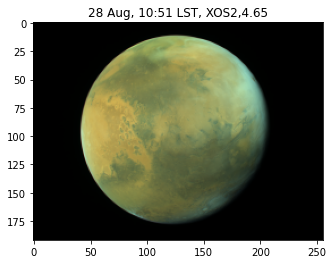

In [8]:
#plots the disk of Mars with correct orientation
if(res_maxrow[0]>avg_row):
    plt.title("28 Aug, 10:51 LST, XOS2,4.65")
    plt.imshow(rgb_default,origin='lower')
    print('lower')
else:
    print('upper')
    plt.title("28 Aug, 10:51 LST, XOS2,4.65")
    plt.imshow(rgb_default,origin='upper')

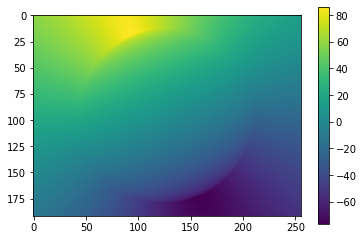

In [9]:
#shows the latitude data
plt.imshow(lat,origin='upper')
plt.colorbar()